# Tanaya APP


### Clone repo

In [1]:
# Run once
!git clone https://github.com/Abdansb/tanaya-capstone.git

Cloning into 'tanaya-capstone'...
remote: Enumerating objects: 1554, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1554 (delta 1), reused 4 (delta 1), pack-reused 1545
Receiving objects: 100% (1554/1554), 110.17 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [2]:
import os

base_dir = 'tanaya-capstone/notebooks/train'

chernozem_dir = os.path.join(base_dir, 'chernozem')
laterite_dir = os.path.join(base_dir, 'laterite')
podsolik_dir = os.path.join(base_dir, 'podsolik')

print('total training chernozem images:', len(os.listdir(chernozem_dir)))

alluvial_files = os.listdir(chernozem_dir)
print(alluvial_files[:10])

total training chernozem images: 223
['156.jpg', '71.jpg', '205.jpg', '88.jpg', '140.jpg', '72.jpg', '49.jpg', '81.jpg', '107.jpg', '215.jpg']


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_alluvial = [os.path.join(alluvial_dir, fname) 
                for fname in alluvial_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_alluvial):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

NameError: ignored

In [50]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [52]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [5]:
# Download module, Run once
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [48]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tanaya-capstone/notebooks/train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tanaya-capstone/notebooks/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

Found 433 images belonging to 3 classes.
Found 158 images belonging to 3 classes.


In [53]:
# Train the model
history = model.fit(train_generator, epochs=20, steps_per_epoch=43, validation_data = validation_generator, verbose = 1, validation_steps=15)

Epoch 1/20
43/43 [==============================] - 5s 90ms/step - loss: 1.2173 - accuracy: 0.8960 - val_loss: 0.7881 - val_accuracy: 0.8333
Epoch 2/20
43/43 [==============================] - 6s 136ms/step - loss: 0.0681 - accuracy: 0.9693 - val_loss: 0.4491 - val_accuracy: 0.8600
Epoch 3/20
43/43 [==============================] - 4s 90ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4208 - val_accuracy: 0.8867
Epoch 4/20
43/43 [==============================] - 5s 116ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3469 - val_accuracy: 0.9533
Epoch 5/20
43/43 [==============================] - 4s 88ms/step - loss: 0.0210 - accuracy: 0.9953 - val_loss: 1.1857 - val_accuracy: 0.8067
Epoch 6/20
43/43 [==============================] - 4s 91ms/step - loss: 0.0191 - accuracy: 0.9929 - val_loss: 1.6263 - val_accuracy: 0.7867
Epoch 7/20
43/43 [==============================] - 5s 118ms/step - loss: 0.2357 - accuracy: 0.9716 - val_loss: 0.1240 - val_accuracy: 0.9733
Epoch 8/20

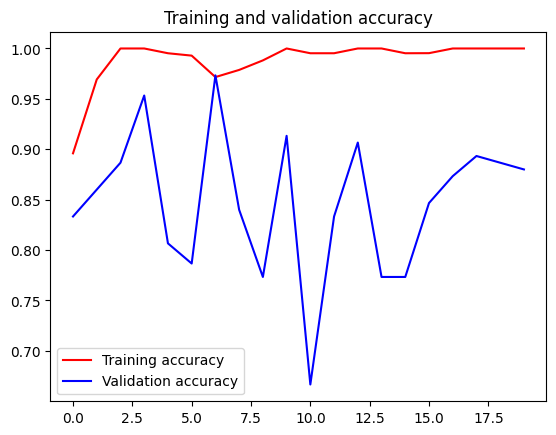

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [65]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = load_img(
    path,
    grayscale=False,
    color_mode='rgb',
    target_size=(150, 150),
    #interpolation='nearest',
    keep_aspect_ratio=True
)
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print("[chernozem, laterite, podsolik]")
  print(classes)

Saving images.jpeg to images.jpeg
1/1 [==============================] - 0s 20ms/step
images.jpeg
[chernozem, laterite, podsolik]
[[0. 1. 0.]]


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)